# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{city}&APPID={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(url + city_url)

    try:
        # Parse the JSON and retrieve data
        response = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

   # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | ihosy
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | khandyga
Processing Record 9 of Set 1 | beau vallon
Processing Record 10 of Set 1 | taro
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | brookings
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | roma
Processing Record 16 of Set 1 | ballina
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 19 of Set 1 | sao vicente
Processing Record 20 of Set 1 | kourou
Processing Record 21 of Set 1 | west island
Processing Recor

Processing Record 40 of Set 4 | saint-pierre
Processing Record 41 of Set 4 | quellon
Processing Record 42 of Set 4 | lazaro cardenas
Processing Record 43 of Set 4 | palikir - national government center
Processing Record 44 of Set 4 | dawei
Processing Record 45 of Set 4 | saudarkrokur
Processing Record 46 of Set 4 | xinzhi
Processing Record 47 of Set 4 | mezhdurechenskiy
Processing Record 48 of Set 4 | aioun
Processing Record 49 of Set 4 | iskateley
Processing Record 0 of Set 5 | lewistown
Processing Record 1 of Set 5 | palmas
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | yei
Processing Record 4 of Set 5 | gangtok
Processing Record 5 of Set 5 | hermanus
Processing Record 6 of Set 5 | tofol
Processing Record 7 of Set 5 | siverskiy
Processing Record 8 of Set 5 | lae
Processing Record 9 of Set 5 | haiku-pauwela
Processing Record 10 of Set 5 | bilibino
Processing Record 11 of Set 5 | queenstown
Processing Record 12 of Set 5 | hammerfest
Processing Record 13 of Set 5

Processing Record 32 of Set 8 | igarka
Processing Record 33 of Set 8 | aljezur
Processing Record 34 of Set 8 | shubarshi
Processing Record 35 of Set 8 | ribeira brava
Processing Record 36 of Set 8 | watford city
Processing Record 37 of Set 8 | vernon
Processing Record 38 of Set 8 | ust'-kut
Processing Record 39 of Set 8 | rovaniemi
Processing Record 40 of Set 8 | metro
Processing Record 41 of Set 8 | lethem
Processing Record 42 of Set 8 | gwadar
Processing Record 43 of Set 8 | necochea
Processing Record 44 of Set 8 | vorkuta
Processing Record 45 of Set 8 | kilju
Processing Record 46 of Set 8 | castillos
Processing Record 47 of Set 8 | prado
Processing Record 48 of Set 8 | hadibu
Processing Record 49 of Set 8 | asha
Processing Record 0 of Set 9 | beyneu
Processing Record 1 of Set 9 | richfield
Processing Record 2 of Set 9 | stetten am kalten markt
Processing Record 3 of Set 9 | amos
Processing Record 4 of Set 9 | chepo
Processing Record 5 of Set 9 | miramichi
Processing Record 6 of Set 

City not found. Skipping...
Processing Record 22 of Set 12 | kish
Processing Record 23 of Set 12 | maceio
Processing Record 24 of Set 12 | olyokminsk
Processing Record 25 of Set 12 | zliten
Processing Record 26 of Set 12 | berber
Processing Record 27 of Set 12 | moyynkum
Processing Record 28 of Set 12 | pimentel
Processing Record 29 of Set 12 | konarka
Processing Record 30 of Set 12 | nejo
Processing Record 31 of Set 12 | puerto san jose
Processing Record 32 of Set 12 | nadym
Processing Record 33 of Set 12 | mamuju
Processing Record 34 of Set 12 | azovo
Processing Record 35 of Set 12 | natal
Processing Record 36 of Set 12 | obudu
Processing Record 37 of Set 12 | itamaraca
Processing Record 38 of Set 12 | gueltat zemmour
City not found. Skipping...
Processing Record 39 of Set 12 | al manshah
Processing Record 40 of Set 12 | salinopolis
Processing Record 41 of Set 12 | tinghir
Processing Record 42 of Set 12 | nili
Processing Record 43 of Set 12 | dwarka
Processing Record 44 of Set 12 | i

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Coverting UNIX to Datetime
date = []
i=0
city_data_df['Date'] = city_data_df['Date'].astype(int)
date = [x for x in city_data_df['Date']]
for x in city_data_df['Date']:
    date[i] = datetime.utcfromtimestamp(x).strftime('%Y-%m-%d')
    i+=1
city_data_df['Date'] = date    

city_data_df['Max Temp'] = (city_data_df['Max Temp']-273.15)
# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,15.29,52,0,3.05,AU,2023-05-26
1,hithadhoo,-0.6000,73.0833,24.42,91,100,3.15,MV,2023-05-26
2,tiksi,71.6872,128.8694,0.80,91,100,4.47,RU,2023-05-26
3,thompson,55.7435,-97.8558,9.09,93,100,8.75,CA,2023-05-26
4,hamilton,39.1834,-84.5333,11.66,64,0,4.12,US,2023-05-26


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,15.29,52,0,3.05,AU,2023-05-26
1,hithadhoo,-0.6000,73.0833,24.42,91,100,3.15,MV,2023-05-26
2,tiksi,71.6872,128.8694,0.80,91,100,4.47,RU,2023-05-26
3,thompson,55.7435,-97.8558,9.09,93,100,8.75,CA,2023-05-26
4,hamilton,39.1834,-84.5333,11.66,64,0,4.12,US,2023-05-26


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

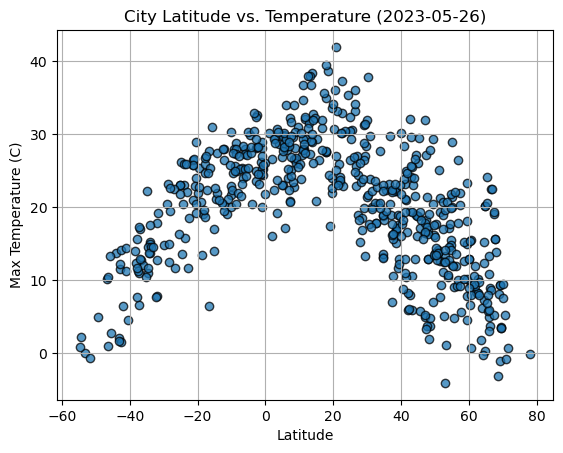

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolor='black', alpha = 0.75)
plt.title(f'City Latitude vs. Temperature ({date[0]})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Incorporate the other graph properties


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

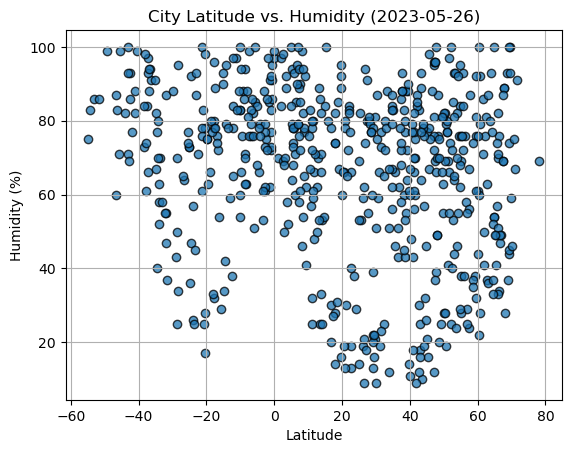

<Figure size 640x480 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolor='black', alpha = 0.75)
plt.title(f'City Latitude vs. Humidity ({date[0]})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

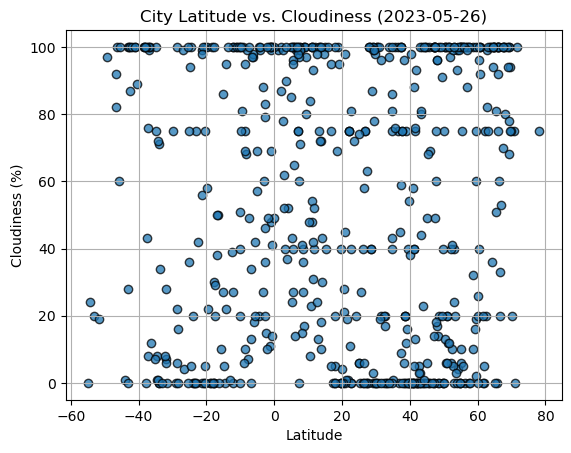

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolor='black', alpha = 0.75)
plt.title(f'City Latitude vs. Cloudiness ({date[0]})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

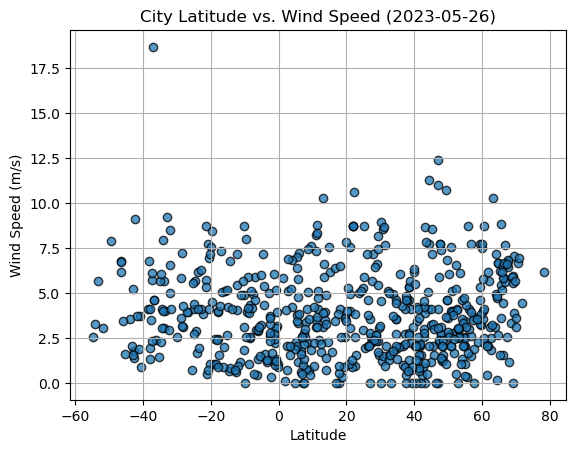

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolor='black', alpha = 0.75)
plt.title(f'City Latitude vs. Wind Speed ({date[0]})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lineregress(x,y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return(regress_values,line_eq)
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,tiksi,71.6872,128.8694,0.80,91,100,4.47,RU,2023-05-26
3,thompson,55.7435,-97.8558,9.09,93,100,8.75,CA,2023-05-26
4,hamilton,39.1834,-84.5333,11.66,64,0,4.12,US,2023-05-26
7,khandyga,62.6667,135.6000,10.22,63,99,2.50,RU,2023-05-26
10,brookings,44.3114,-96.7984,18.99,57,0,7.72,US,2023-05-26


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,15.29,52,0,3.05,AU,2023-05-26
1,hithadhoo,-0.6000,73.0833,24.42,91,100,3.15,MV,2023-05-26
5,ihosy,-22.4000,46.1167,18.52,71,42,3.83,MG,2023-05-26
6,port-aux-francais,-49.3500,70.2167,4.98,99,97,7.90,TF,2023-05-26
8,beau vallon,-20.4189,57.6953,24.03,78,100,6.98,MU,2023-05-26


###  Temperature vs. Latitude Linear Regression Plot

PearsonRResult(statistic=-0.7388738274622689, pvalue=4.046654151675886e-72)


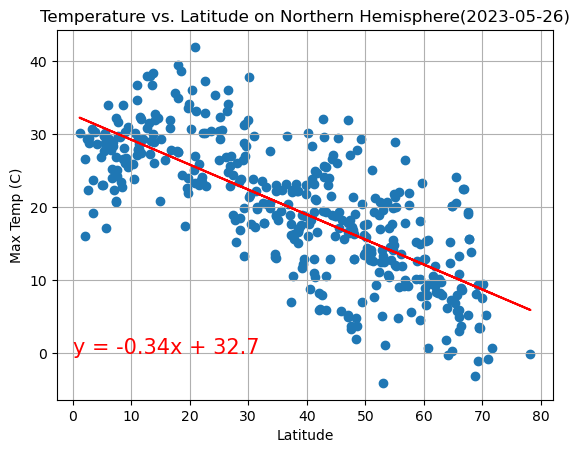

In [23]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
coorTemp = st.pearsonr(x,y)
print(coorTemp)
(regress_values,line_eq) = lineregress(x, y)
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title(f'Temperature vs. Latitude on Northern Hemisphere({date[0]})')
plt.ylabel('Max Temp (C)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig("../output_data/TN.png")
plt.show()


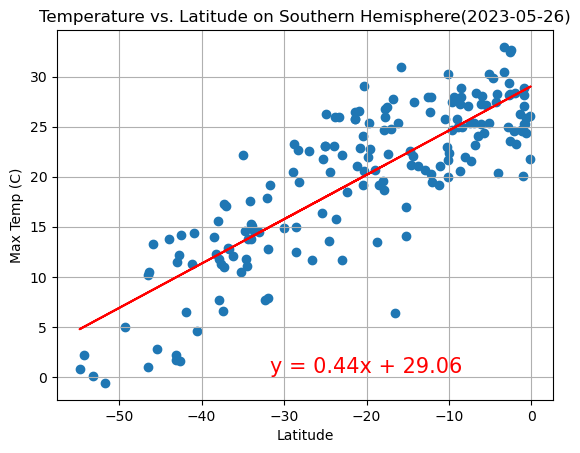

In [24]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
max_x = max(southern_hemi_df["Lat"])
min_x = min(southern_hemi_df["Lat"])
(regress_values,line_eq) = lineregress(x, y)
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20, 0),ha='center', va='bottom',fontsize=15,color="red")
plt.title(f'Temperature vs. Latitude on Southern Hemisphere({date[0]})')
plt.ylabel('Max Temp (C)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig("../output_data/TS.png")
plt.show()

**Discussion about the linear relationship:Temperature vs. Latitude on Northern/Southern Hemisphere**-The effects of latitude on Max Temp vary between the two hemispheres.

As we move closer to the Equator (Latitude = 0), the maximum temperature rises in both hemispheres. This is due to the more direct path of the Sun's rays at the equator, resulting in higher temperatures. Conversely, at higher latitudes, the Sun's rays become less direct, leading to lower temperatures. The farther a location is from the equator, the lower its temperature tends to be.

However, there are notable differences between the two hemispheres. In the Northern Hemisphere, the maximum temperatures are generally slightly higher than those in the Southern Hemisphere. This can be observed by a slightly higher intercept in temperature values for the Northern Hemisphere.

Furthermore, the specific impact of latitude on maximum temperature varies for each hemisphere. In the Northern Hemisphere, as one moves farther away from the equator towards higher latitudes, temperatures gradually decrease. The reason for this is that the Sun's rays strike the Earth's surface at a less direct angle, causing less heating and resulting in lower maximum temperatures.

Similarly, in the Southern Hemisphere, as one moves away from the equator towards higher latitudes, the maximum temperatures also decrease. However, this effect is relatively less pronounced compared to the Northern Hemisphere.

In summary, the effects of latitude on maximum temperature involve higher temperatures closer to the Equator and lower temperatures as one moves away from the equator towards higher latitudes. The Northern Hemisphere generally experiences slightly higher maximum temperatures compared to the Southern Hemisphere.Other various factors like elevation, ocean currents, and precipitation introduce variations that also impact climate patterns.

### Humidity vs. Latitude Linear Regression Plot

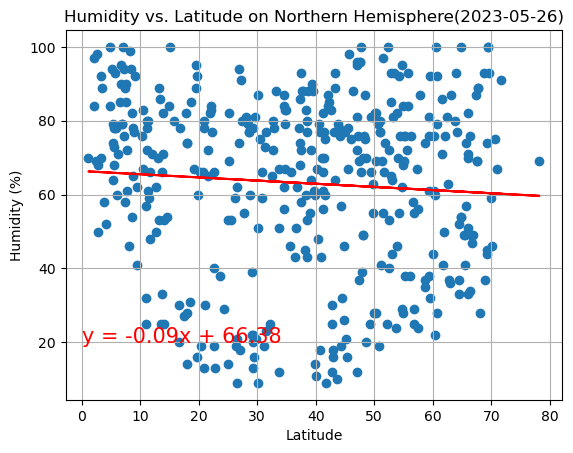

In [25]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

(regress_values,line_eq) = lineregress(x, y)
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title(f'Humidity vs. Latitude on Northern Hemisphere({date[0]})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig("../output_data/HN.png")
plt.show()

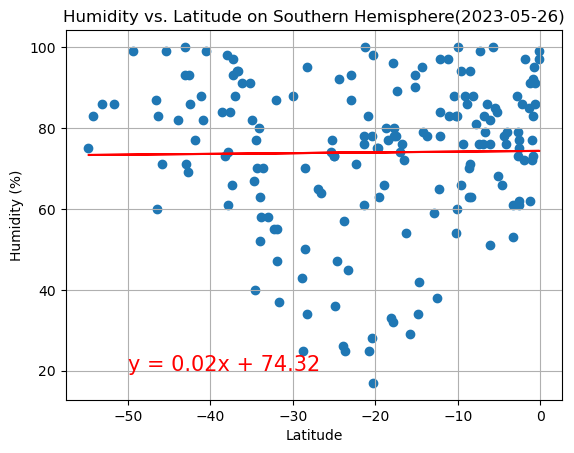

In [18]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

(regress_values,line_eq) = lineregress(x, y)
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title(f'Humidity vs. Latitude on Southern Hemisphere({date[0]})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig("../output_data/HS.png")
plt.show()


**Discussion about the linear relationship: Humidity vs. Latitude on Northern/Southern Hemisphere**-
The effects of latitude on humidity vary between the two hemispheres.

In general, as one moves closer to the Equator (latitude = 0), the humidity levels tend to be higher. This is because the equatorial regions receive more direct sunlight, which leads to increased evaporation from bodies of water and moisture in the atmosphere. As a result, these areas typically experience higher levels of humidity.

However, there are notable differences between the Northern Hemisphere and the Southern Hemisphere regarding humidity patterns.

In the Northern Hemisphere, as one moves away from the equator towards higher latitudes, the humidity levels generally decrease. This is primarily due to the cooling effect of the polar regions, which results in less evaporation and moisture in the air. As a result, higher latitudes in the Northern Hemisphere tend to have lower humidity compared to equatorial regions.

Conversely, in the Southern Hemisphere, the relationship between latitude and humidity is not as straightforward. While there is a general trend of decreasing humidity as one moves away from the equator towards higher latitudes, the effect is less pronounced compared to the Northern Hemisphere. This is because the Southern Hemisphere has a higher proportion of oceanic coverage, which contributes to higher moisture levels and more stable humidity patterns.

Additionally, other factors such as prevailing winds, ocean currents, and local geography can influence humidity levels in specific regions, further adding to the complexity of the relationship between latitude and humidity.

In summary, the effects of latitude on humidity involve higher humidity levels closer to the Equator and lower humidity levels as one moves away from the equator towards higher latitudes. However, the Northern Hemisphere generally experiences a more significant decrease in humidity with increasing latitude compared to the Southern Hemisphere.



### Cloudiness vs. Latitude Linear Regression Plot

y = 0.02x + 52.7


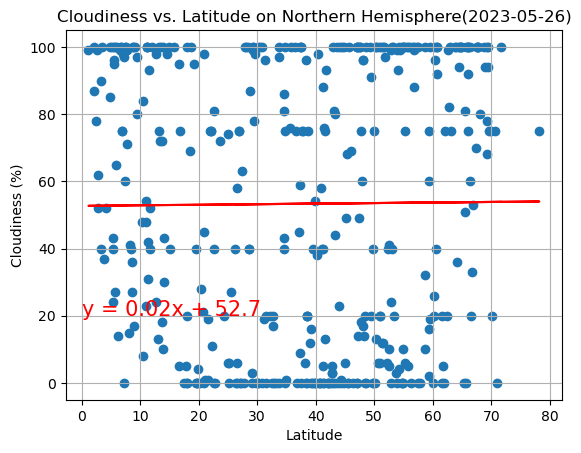

In [19]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

(regress_values,line_eq) = lineregress(x, y)
plt.scatter(x,y)
print(line_eq)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title(f'Cloudiness vs. Latitude on Northern Hemisphere({date[0]})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig("../output_data/CN.png")
plt.show()



y = 0.14x + 54.96


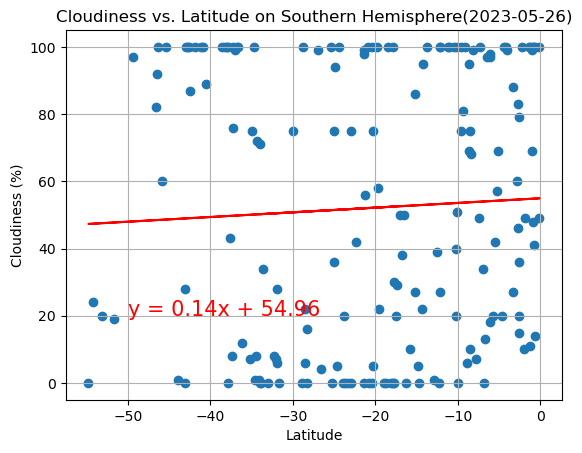

In [20]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

(regress_values,line_eq) = lineregress(x, y)
plt.scatter(x,y)
print(line_eq)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title(f'Cloudiness vs. Latitude on Southern Hemisphere({date[0]})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig("../output_data/CS.png")
plt.show()

**Discussion about the linear relationship: Cloudiness vs. Latitude on Northern/Southern Hemisphere** The effects of latitude on cloudiness differ between the two hemispheres.

Generally, as one moves closer to the Equator (latitude = 0), the cloudiness levels tend to be higher. This is primarily because the equatorial regions receive more solar energy, leading to increased evaporation and moisture in the atmosphere. The abundance of moisture provides favorable conditions for cloud formation, resulting in higher cloudiness near the equator.

However, there are notable distinctions between the Northern Hemisphere and the Southern Hemisphere regarding cloudiness patterns.

In the Northern Hemisphere, as one moves away from the equator towards higher latitudes, cloudiness levels tend to decrease. This reduction in cloud cover is primarily attributed to the influence of mid-latitude weather systems, such as frontal systems and storm tracks. These systems often lead to the formation of clouds in the mid-latitudes, but their influence diminishes as one approaches higher latitudes. Consequently, higher latitudes in the Northern Hemisphere generally experience lower cloudiness compared to equatorial and mid-latitude regions.

In contrast, the Southern Hemisphere exhibits a less pronounced relationship between latitude and cloudiness. While there is a general tendency for cloudiness to decrease with increasing latitude, the effect is not as significant as in the Northern Hemisphere. The Southern Hemisphere's larger expanse of oceanic areas and fewer landmasses contribute to relatively more uniform cloud patterns across latitudes. Additionally, the Southern Hemisphere's atmospheric circulation patterns differ from the Northern Hemisphere, influencing cloud formation and distribution.

It is important to note that cloudiness is also influenced by factors beyond latitude, such as local topography, prevailing winds, and proximity to large bodies of water. These factors can introduce regional variations in cloudiness patterns.

In summary, the effects of latitude on cloudiness involve higher cloudiness levels closer to the Equator and lower cloudiness levels as one moves away from the equator towards higher latitudes. However, the Northern Hemisphere generally experiences a more pronounced decrease in cloudiness with increasing latitude compared to the Southern Hemisphere, where the relationship between latitude and cloudiness is comparatively more uniform.






### Wind Speed vs. Latitude Linear Regression Plot

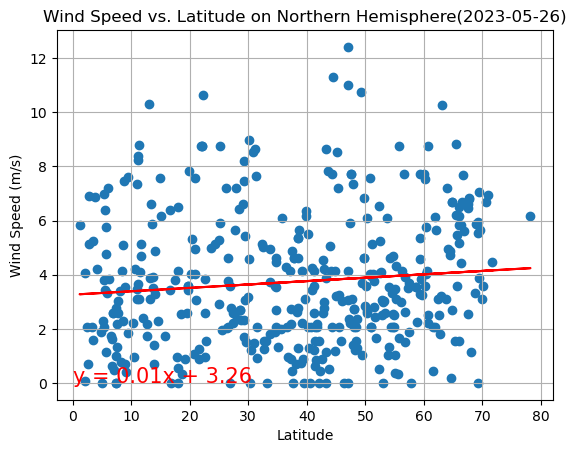

In [21]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

(regress_values,line_eq) = lineregress(x, y)
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title(f'Wind Speed vs. Latitude on Northern Hemisphere({date[0]})')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig("../output_data/WN.png")
plt.show()

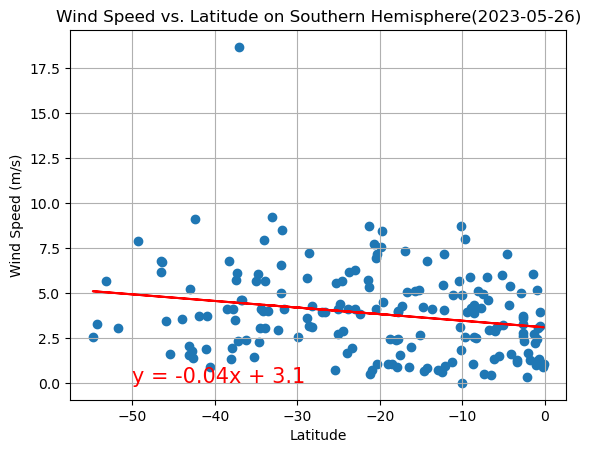

In [22]:
# Southern Hemisphere

x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

(regress_values,line_eq) = lineregress(x, y)
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.title(f'Wind Speed vs. Latitude on Southern Hemisphere({date[0]})')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()
plt.savefig("../output_data/WS.png")
plt.show()

**Discussion about the linear relationship: Wind Speed vs. Latitude on Northern/Southern Hemisphere** The effects of latitude on wind speed vary between the two hemispheres.

In general, as one moves closer to the Equator (latitude = 0), the average wind speeds tend to be lower. This is because near the equator, the warm air rises, creating an area of low pressure. The air then moves towards higher latitudes, resulting in relatively weaker winds near the Equator.

However, there are notable differences in wind speed patterns between the Northern Hemisphere and the Southern Hemisphere.

In the Northern Hemisphere, as one moves away from the equator towards higher latitudes, the average wind speeds tend to increase. This is due to the Coriolis effect, caused by the Earth's rotation. The Coriolis effect deflects moving air to the right in the Northern Hemisphere, resulting in the formation of prevailing winds. These prevailing winds, such as the trade winds and prevailing westerlies, lead to higher wind speeds in the mid-latitudes compared to the equatorial regions.

In the Southern Hemisphere, the relationship between latitude and wind speed is generally similar to that in the Northern Hemisphere, but with a few distinctions. As one moves away from the equator towards higher latitudes, the average wind speeds also tend to increase. However, the Coriolis effect in the Southern Hemisphere deflects moving air to the left, opposite to the deflection in the Northern Hemisphere. This reversal of the Coriolis effect leads to differences in wind patterns between the two hemispheres. The Southern Hemisphere experiences prevailing winds, such as the trade winds and prevailing easterlies, which contribute to higher wind speeds in the mid-latitudes compared to equatorial regions.

Other factors, such as local topography, ocean currents, and the distribution of landmasses, can further influence wind patterns and lead to regional variations in wind speed.

In summary, the effects of latitude on wind speed involve generally lower wind speeds near the Equator and increasing wind speeds as one moves away from the equator towards higher latitudes. However, the Northern Hemisphere experiences prevailing winds that result in higher wind speeds in the mid-latitudes compared to the equator, while the Southern Hemisphere has prevailing winds that lead to higher wind speeds in the mid-latitudes as well, but with a reversed Coriolis effect.
